In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import json
import datetime

plt.rcParams["figure.figsize"] = (20, 5)

In [2]:
model_name = "STREAM"

In [3]:
gpa_analysis = pd.read_csv("analysis/{}_gpa_analysis.csv".format(model_name))
rip_analysis = pd.read_csv("analysis/{}_rip_analysis.csv".format(model_name))

In [4]:
gpa_analysis

,threshold,p,p',n/p ratio,upper limit for train/val accuracy,accuracy'
0,0,674207,0,5.240880,0.000000,0.000000
1,1,288283,385924,12.256838,0.109221,0.109221
2,2,159264,129019,22.186043,0.182248,0.073027
3,3,100473,58791,35.168035,0.232164,0.049915
4,4,73429,27044,48.120470,0.262779,0.030615
5,5,59735,13694,59.151888,0.282156,0.019378
6,6,51757,7978,68.269761,0.295704,0.013547
7,7,46554,5203,75.899772,0.306011,0.010308
8,8,42579,3975,82.985462,0.315011,0.009000
9,9,39380,3199,89.726714,0.323159,0.008148


In [5]:
rip_analysis

,threshold,p,p',n/p ratio,upper limit for train/val accuracy,accuracy'
0,0,49547,0,71.314873,0.000000,0.000000
1,1,11850,37697,298.180422,0.010669,0.010669
2,2,7240,4610,488.043923,0.013278,0.002609
3,3,5350,1890,660.455701,0.014883,0.001605
4,4,4230,1120,835.328132,0.016151,0.001268
5,5,3527,703,1001.825347,0.017146,0.000995
6,6,2977,550,1186.912328,0.018080,0.000934
7,7,2538,439,1392.213554,0.018949,0.000870
8,8,2215,323,1595.231603,0.019681,0.000731
9,9,1959,256,1803.694742,0.020333,0.000652


In [6]:
def analysis_visualize(df):
    fig, ax_1 = plt.subplots()

    ax_1.set_xlabel("threshold")
    ax_1.set_xticks(df["threshold"])
    
    color_1 = 'tab:red'    
    ax_1.set_ylabel("p", color=color_1)
    #ax_1.plot(df["threshold"], df["p"], "o-", color=color_1)
    ax_1.plot(df["threshold"], df["p'"], "o-", color=color_1)
    ax_1.tick_params(axis='y', labelcolor=color_1)
    #ax_1.vlines(df["threshold"], 0, df["p"], color=color_1, linestyles="dashed")

    ax_2 = ax_1.twinx()     # instantiate a second axes that shares the same x-axis

    color_2 = 'tab:blue'
    ax_2.set_ylabel("upper limit for train/val accuracy", color=color_2)
    #ax_2.plot(df["threshold"], df["upper limit for train/val accuracy"], "o-", color=color_2)
    ax_2.plot(df["threshold"], df["accuracy'"], "o-", color=color_2)
    ax_2.tick_params(axis='y', labelcolor=color_2)

    #ax_2.text(df["threshold"], str(df["upper limit for train/val accuracy"]), "b+")

    # ax_3 = ax_1.twinx()

    # color_3 = 'tab:orange'
    # ax_3.bar(df["threshold"], df["n/p ratio"], color=color_3, alpha=0.5)
    # ax_3.axes.yaxis.set_visible(False)

    plt.show()

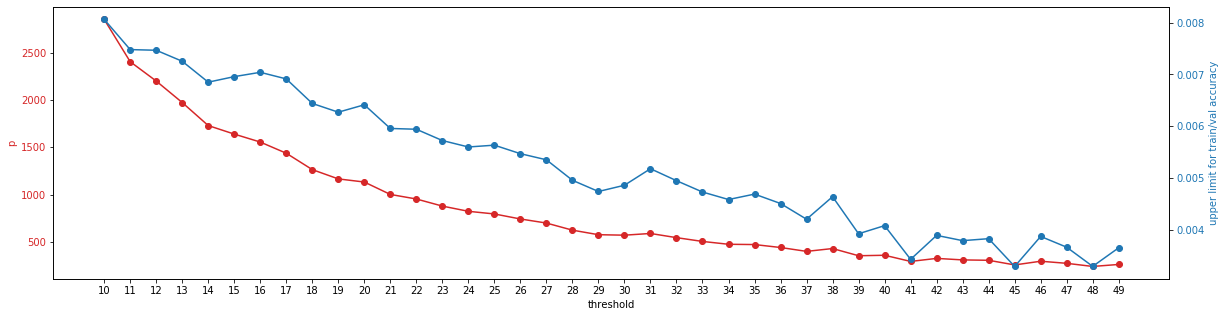

In [7]:
analysis_visualize(gpa_analysis[10:])